### Estimating Housing Price

This machine learning model estimates the price of a house (in thousands of $) based on its area (square footage).

- **Feature**: Square footage of the house (in units of 100 sq ft)
- **Target**: Price of the house (in 1000s of $)

This model is built with `linear regression` methodology dependent on one variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from data_processing import DataProcessing

The `compute_cost` function shown below, calculates the cost function value for the given feature values and model parameters - w and b. 

In [2]:
def compute_cost(x, y, w, b):
    y_hat = (w * x) + b
    diff = (y_hat - y) ** 2
    cost = np.mean(diff)
    cost = cost / 2
    return cost

The `compute_gradient` function shown below, calculates the delta value by which the model parameters - w and b, must be reduced to minimize the value of the cost function. It returns `(dj_dw, dj_db)` - with `dj_dw` representing the decrease in value of `w` and `dj_db` representing the decrease in value of `b`.

In [3]:
def compute_gradient(x, y, w, b):
    y_hat = (w * x) + b
    diff = (y_hat - y)
    dj_db = np.mean(diff)
    djdw_i = diff * x
    dj_dw = np.mean(djdw_i)
    return dj_dw, dj_db

In [4]:
dp = DataProcessing("housing-prices.csv")
xi, yi = dp.get_training_data()
w = b = float(0)
alpha = 0.002
epoch = 10000
print(f"m = {xi.shape[0]}")
print(f"w = {w}")
print(f"b = {b}")
print(f"alpha = {alpha}")
print(f"Number of iterations = {epoch}")

m = 160
w = 0.0
b = 0.0
alpha = 0.002
Number of iterations = 10000


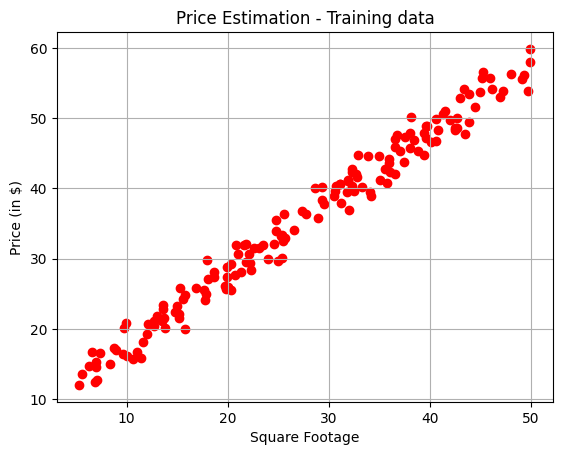

In [5]:
fig, ax = plt.subplots()
ax.scatter(xi, yi, c='r')
ax.set_title("Price Estimation - Training data")
ax.set_xlabel("Square Footage")
ax.set_ylabel("Price (in $)")
ax.grid()

In [6]:
ws = np.empty(0, dtype='float')
bs = np.empty(0, dtype='float')
jwbs = np.empty(0, dtype='float')
w_final = b_final = float(0)
min_cost = float('inf')
for i in range(1, epoch + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    ws = np.append(ws, w)
    bs = np.append(bs, b)
    jwbs = np.append(jwbs, cost)
    if i % (math.floor(epoch / 10)) == 0:
        print(f"Iteration {i} :: Cost = {cost} :: dj_dw = {dj_dw} :: dj_db = {dj_db} :: w = {float(w)} :: b = {float(b)}")
    
    if cost < min_cost:
        w_final = w
        b_final = b
        min_cost = cost

print(f"Minimum cost = {min_cost} at (w, b) = ({w_final}, {b_final})")

Iteration 1000 :: Cost = 4.22644568210173 :: dj_dw = 0.0282475143090279 :: dj_db = -0.9318113604022017 :: w = 1.176152847293951 :: b = 2.246745159980523
Iteration 2000 :: Cost = 2.956136662759989 :: dj_dw = 0.020281752291673883 :: dj_db = -0.6690417778841299 :: w = 1.1280705650434286 :: b = 3.832853457679555
Iteration 3000 :: Cost = 2.3012594853499544 :: dj_dw = 0.014562324724192255 :: dj_db = -0.4803728732832274 :: w = 1.0935474233769318 :: b = 4.9716812939824955
Iteration 4000 :: Cost = 1.963653350966397 :: dj_dw = 0.010455768235172247 :: dj_db = -0.3449083525339358 :: w = 1.0687597624186784 :: b = 5.789361172853249
Iteration 5000 :: Cost = 1.7896086508225058 :: dj_dw = 0.0075072552952525125 :: dj_db = -0.2476446491130771 :: w = 1.0509621893670458 :: b = 6.376456397431357
Iteration 6000 :: Cost = 1.6998841033006205 :: dj_dw = 0.005390219140083019 :: dj_db = -0.17780918259527262 :: w = 1.038183508592702 :: b = 6.797991538051972
Iteration 7000 :: Cost = 1.6536287768163824 :: dj_dw = 0.

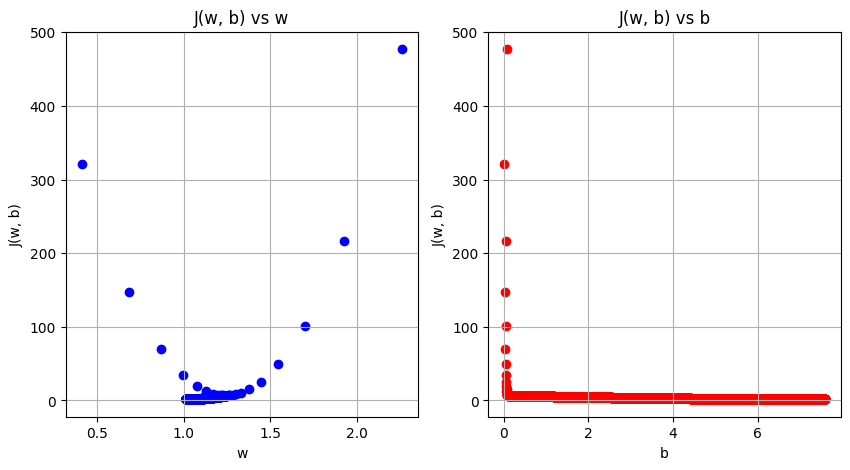

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].set_title("J(w, b) vs w")
axs[0].scatter(ws, jwbs, c='b')
axs[0].set_ylabel("J(w, b)")
axs[0].set_xlabel("w")
axs[0].grid()

axs[1].set_title("J(w, b) vs b")
axs[1].scatter(bs, jwbs, c='r')
axs[1].set_ylabel("J(w, b)")
axs[1].set_xlabel("b")
axs[1].grid()